# [Polynomial & Spline Interpolation with Scikit Learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

In [6]:
def f(x):
    """Defines a function to approximate.

    Args:
        x (ndarray): This is the list of points that will seed the
                     function.

    Returns:
        ndarray: This is a list of points that are representative of the
                 approximated function.
    """
    return x * np.sin(x)

In [7]:
x_plot = np.linspace(-1, 11, 100)
x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

In [8]:
x_train = x_train[:, np.newaxis]
x_plot = x_plot[:, np.newaxis]

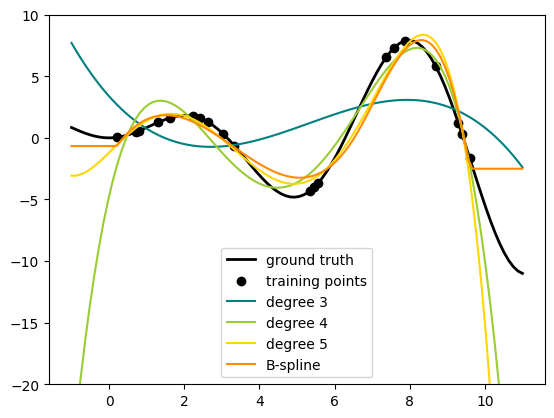

In [10]:
# Plot Function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
for degree in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(x_train, y_train)
    y_plot = model.predict(x_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")

# B-spline with 4 + 3 - 1 = 6 basis functions
model = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))
model.fit(x_train, y_train)

y_plot = model.predict(x_plot)
ax.plot(x_plot, y_plot, label="B-spline")
ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()